__Dhyan Thakkar__
<br>
__March 18, 2022__

# Research Journal 9 

## 1. Experience
- Started coding the differential equations for velocity dispersions, and width dispersions, defined all variables, converted units, and did research on finding approprate reasonable values for dark matter density. 

### Motivation
- the main next step in figuring out how dark matter sub-halos affect tidal streams, is to figure out the diffusion coefficient to see how a tidal stream of some mass moving at some velocity is affect by a dark matter halo of some density. 

## <font color=red>2. What? (What happened?)</font>
### <font color=black>Describe what happened during your activities for the week</font>
- The following is the equations for velocity dispersion, and width dispersion: - Velocity dispersion: $$  (1) \space \space \space \frac{d}{dt} \langle \Delta v^2 \rangle = \frac{4 \pi (kGm)^2 N}{vb_{min}^2} \langle w^2 \rangle$$ $$ (2) \space \space \space\frac{d}{dt} \langle \Delta v^2 \rangle = \frac{4 \pi (kGm)^2 N}{v} \pi N v t \langle w^2 \rangle = (2 \pi kGmN)^2  \langle w^2 \rangle  = (2 \pi kG \rho)^2 \langle w^2 \rangle = (2 \pi kG f_{DM} \rho)^2 \langle w^2 \rangle $$ <br>
- Width dispersion: <br>$$ (3) \space \space \space\frac{d}{dt} \langle w \rangle ^{\frac{1}{2}} = \langle \Delta v \rangle ^{\frac{1}{2}}$$ $$ (4) \space \space \space\frac{d}{dt} \langle w ^2 \rangle = 2 \langle w ^2 \rangle ^ {\frac{1}{2}} \langle \Delta v \rangle ^{\frac{1}{2}} $$

## 2.1 Explaining Every Term in Eqn for Velocity Dispersion 
- Starting with the equation for the velocity dispersion; looking at the top equation, $k$ is just a term that is on the order of unity, it takes into account the Coulomb Logarithm and the Error function (According to Brandt's Paper). The Coulomb Logarithm includes the mass of the stream so that is accounted for in the $k$ factor.
<br>
<br>
- Next we have the terms $N$ & $m$ which are the subhalo number density as well as the subhalo mass (in units of solar masses $M_{sol}$), if we assume that the tidal stream is travelling through subhalos of the same mass then the number density multiplied by the mass just becomes the mass density factor $ \rho $ in units of solar mass per cubic pc $ M_{sol}\space pc^{-3}$
<br>
<br>
- $b_{min}^2$ is found in Hui's paper it is the minimum impact parameter, we are assuming that these dark matter particles are point like objects and it is given by the equation $ b_{min}^ {-2} = \pi N v t $, where $v$ is the speed of the dark matter particles relative to the stream in units of $pc \space s^{-1}$. For our calculations we will assume that the dark matter particles move much faster than the stream, just as the assumption in Brandt's paper. 
<br>
<br>
- $ f_{DM} $ is the fraction of dark matter that is in a form og point mass objects with the same mass $m$
<br>
<br>
- Lastly, there is the factor of Newton's Constant $G$, which in SI units is $6.67 \times 10^{-11} N \space m^2 \space kg^{-2} = 6.67 \times 10^{-11} m^3 \space kg^{-1} \space s^{-2} $, we can convert this into units of $ pc^3 \space M_{sol}^{-1} \space s^{-2}$ and we get the following value for $G$; $$ G = 4.541 \times 10^{-30} pc^3 \space M_{sol}^{-1} \space s^{-2} $$  
<br>

## 2.2 Explaining Terms in Eqn for Width Dispersion 

- The width of the tidal stream is given in units of $pc$

## <font color=red>3. So What? (What does it mean?)</font>
### <font color=black>Describe your results</font>
<br>
- I will just plug in arbitrary numbers for the variables, and solve the ODEs and see if they actually result in anything, then the goal will be to find reasonable values for the terms described above, define them in the code and plot resutls. 

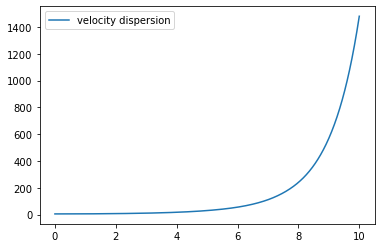

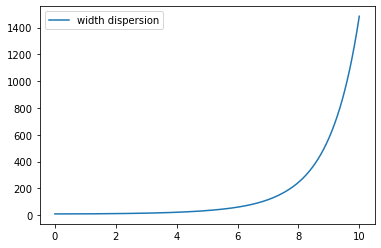

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp 
import astropy.units as un
import astropy.constants as cnst
import profile as pf

# Defining the ODEs 
def f(t,y): 
  vel,width = y 
  return np.array(0.1*t*width, 2*np.sqrt((width**2) *vel**2))
t = np.linspace(0,10,1000)
sol = solve_ivp(f, [0,10], [5,10], t_eval = t)

velocity = sol.y[0]
width = sol.y[1]
t = sol.t

plt.plot(t, velocity, label = 'velocity dispersion')
plt.legend()
plt.show()

plt.plot(t, width, label = 'width dispersion')
plt.legend()
plt.show()

- So the results came out looking good, we can see from the values we've chosen that in this particular scenario the velocity and width are changing at approximately the same rate.
<br>
<br>
- We already know the values of a few of the constants in the equations we have, $ G = 4.541 \times 10^{-30} pc^3 \space M_{sol}^{-1} \space s^{-2} $, $k = 1$, we can make $f_{DM} $ a free parameter and see how to solutions vary with arbitrary values, then decide which value makes the most sense. 
<br>
<br>
- The only really challenging constant is the mass density $ \rho $, because this doesn't have to be a constant, the density could be a function of the radius from the center of our milky way galaxy. There are a couple ways to go about this issue.
    - Firstly, we could also make $ \rho $ a free parameter, and see how the solution changes with changing values of the mass density. (Method used in Brandt's Paper) 
    - Secondly, through research we can find the dark matter density profile for our milky way galaxy, find the size of GD1 stream (length), using that we can define a dark matter density function for the length of GD1, and include that in our calculations. 
<br>
<br>
- The following is research articles is information I've found on the above mentioned methods for finding values of $ \rho $

- __The Spur and the Gap in GD-1: Dynamical evidence for a dark substructure in the Milky Way halo by Ana Bonaca, David W. Hogg, Adrian M. Price-Whelan, Charlie Conroy__ : Length of GD1 is approximately $ l_{GD1} = 10 \space kpc = 10 \times 10^3 \space pc$
<br>
<br>
- __A deeper look at the GD1 stream: density variations and wiggles by T. J. L. de Boer, V. Belokurov, S. E. Koposov, L. Ferrarese, D. Erkal, P. Cot and J. F. Navarro__ : Distance from center of galxy is approximately $d_{GD1} = 15 \space kpc = 15 \times 10^3 \space pc $ 
<br>
<br>
- I will assume that the "head" of the stream is about 15 kpc from the center of the galaxy, therefore the "tail" of the stream is 25 kpc from the center of the galaxy 
<br>
<br>
- Just as a test let's assume a really simple dark matter density profile, integrate this, and then see what we get for our solution.  $$ \frac{d}{dr} \rho (r) = -\frac{1}{r^2},  15 \space kpc \le r \ge 25 \space kpc $$, and we will assume that $ \rho (0) = \rho_0 = 8.5 \times 10^6 M_{sol} \space pc^{-3} $ (__Dark matter in the Galactic center Tim Linden__)

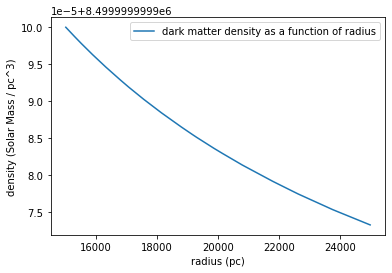

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
r0 = 15*10**3
rf = 25 * 10**3
rho0 = 8.5 * 10**6
 
def f(r,rho):
    return -(r)**-2

# Define steps
num_steps = 1000
r = np.abs(np.linspace(r0,rf,num=num_steps+1))
h = np.abs(r[1] - r[0])

# Initialize where results will be saved
rho = np.zeros(num_steps+1)
rho[0] = rho0

# Iterate
for i in range(num_steps):

    ri = r[i]
    rhoi = rho[i]
    rho[i+1] = np.abs(rhoi) + h*f(ri,rhoi) 

# Show the results
plt.plot(r,rho,label='dark matter density as a function of radius')

plt.xlabel('radius (pc)')
plt.ylabel('density (Solar Mass / pc^3)')
plt.legend()
plt.show()




- Now, we can use the $rho$ values to solve the ODEs 

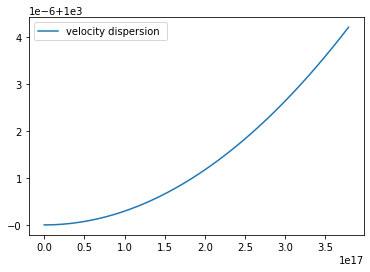

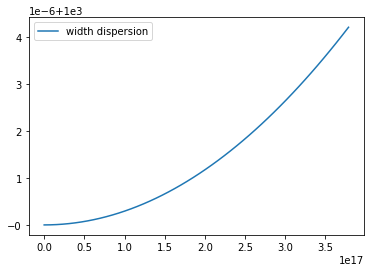

In [4]:
# Defining the ODEs 
G= 4.541*10**-30
k = 1 
f_DM = 1 # for simplicity
prop = pf.McMillanProfile(r_s = 15 * un.kpc, rho_s = 0.011 * un.Msun / (un.pc)**3 )
r = 15 * un.kpc
rho = prop.density(r)
t = np.linspace(0,14) * un.Gyr # 12 Gyr

def f(t, y): 
    vel, width = y 
    return np.array((2*np.pi*cnst.G*k*rho*f_DM)**2 * t * width, 2 * np.sqrt(width * vel))


# need units for width
sol = solve_ivp(f, [0, 12], [220 * un.km / un.s, 1000], t_eval = t)
velocity = sol.y[0]
width = sol.y[1]
t = sol.t

plt.plot(t, velocity, label = 'velocity dispersion ')
plt.legend()
plt.show()

plt.plot(t, width, label = 'width dispersion')
plt.legend()
plt.show()

## <font color=red>4. Now What? (What's next?) </font>
### <font colr=black>Plan for the next week</font>
- The plan for this coming week is to research, and look for a good dark matter density function, that correctly describes the situation in our galaxy, implement this into current code. 
<br>
- Another thing, is that the above density function I defined has 1001 values, I want to find a way using a for loop to solve the diffusion coefficient ODEs for each value of density, then append that to a list of velocity and width arrays, and plot those wrt time. Just to get better results. 
<br>
- Also convert everything from units of seconds to units of Gyrs. 

## <font color=red>5. Bibliography</font>
    1. The Spur and the Gap in GD-1: Dynamical evidence for a dark substructure in the Milky Way halo by Ana Bonaca, David W. Hogg, Adrian M. Price-Whelan, Charlie Conroy
    2. A deeper look at the GD1 stream: density variations and wiggles by T. J. L. de Boer, V. Belokurov, S. E. Koposov, L. Ferrarese, D. Erkal, P. Cot and J. F. Navarro
    3. Dark matter in the Galactic center Tim Linden
    4. CONSTRAINTS ON MACHO DARK MATTER FROM COMPACT STELLAR SYSTEMS IN ULTRA-FAINT DWARF GALAXIES by Timothy D. Brandt